# Numerical modeling workshop (Rijeka, 2022) — first day

TODO: heuristic derivation of equation, use cases, intuition

Advection equation:

\begin{aligned}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0\,\text.
\end{aligned}

General form of analytic solution:

\begin{aligned}
F(x-ct)\,\text.
\end{aligned}

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
c = 10
L = 10000000 # domain size
Deltax = 10000 # step size in x direction
Deltat = 500 # time step
T_steps = 1 * 60 # number of time steps
Nmax = Deltat * T_steps # total time
IM = round(L / Deltax) + 1 # number of points in discretized system

## Bell-shaped (Gaussian) initial function

In [3]:
U = [0 for i in range(IM)]
UF = [0 for i in range(IM)]

for i in range(300, 701):
    U[i] = math.exp(-((i - 500) / 30) ** 2)

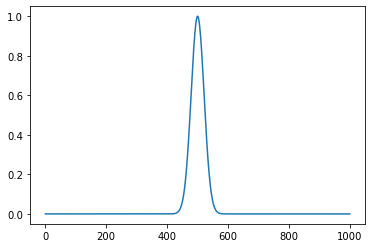

In [4]:
plt.plot(U)

In [5]:
for n in range(Nmax):
    for i in range(2, IM):
        UF[i] = U[i] - c * (Deltat / Deltax) * (U[i] - U[i - 1])
    for i in range(2, IM):
        U[i] = UF[i]
    if n == 250:
        break

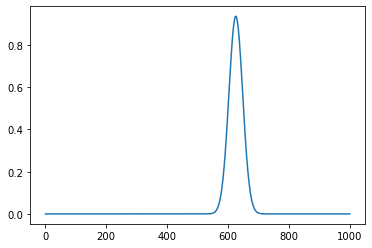

In [6]:
plt.plot(U)

As one can observe, the curve retains its initial shape.

TODO: which time scales allow for certain amount of dissipation of initial Gaussian form?

## Brick-shaped initial function (shorter timescale)

In [7]:
U = [0 for i in range(IM)]
UF = [0 for i in range(IM)]

for i in range(480, 521): #brick of length 41
    U[i] = 1

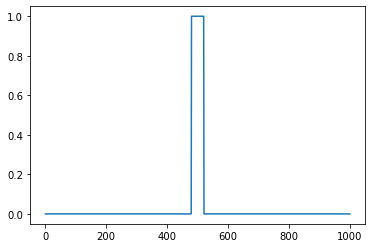

In [8]:
plt.plot(U)

In [9]:
for n in range(Nmax):
    for i in range(2, IM):
        UF[i] = U[i] - c * (Deltat / Deltax) * (U[i] - U[i - 1])
    for i in range(2, IM):
        U[i] = UF[i]
    if n == 25:
        break

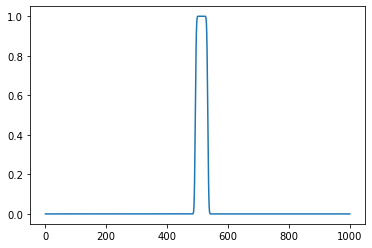

In [10]:
plt.plot(U)

Brick somewhat retains its original shape.

## Brick-shaped initial function (bit longer timescale)

In [11]:
U = [0 for i in range(IM)]
UF = [0 for i in range(IM)]

for i in range(480, 521):
    U[i] = 1

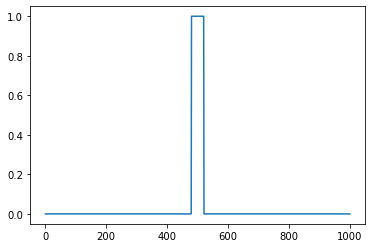

In [12]:
plt.plot(U)

In [13]:
for n in range(Nmax):
    for i in range(2, IM):
        UF[i] = U[i] - c * (Deltat / Deltax) * (U[i] - U[i - 1])
    for i in range(2, IM):
        U[i] = UF[i]
    if n == 250:
        break

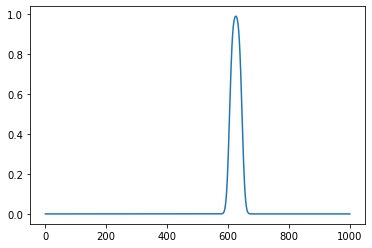

In [14]:
plt.plot(U)

Brick turns to a bell-like shape.

TODO: exact form of this shape

## Bell-shaped (Gaussian) initial function — periodic boundary conditions (PBC)

In [15]:
U = [0 for i in range(IM)]
UF = [0 for i in range(IM)]

for i in range(300, 701):
    U[i] = math.exp(-((i - 500) / 30) ** 2) # gaussian

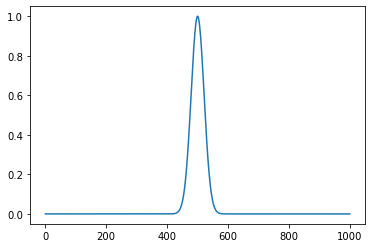

In [16]:
plt.plot(U)

In [17]:
for n in range(Nmax):
    for i in range(2, IM):
        UF[i] = U[i] - c * (Deltat / Deltax) * (U[i] - U[i - 1])
    for i in range(2, IM):
        U[i] = UF[i]
    U[0] = UF[IM - 2] # pbc
    U[1] = UF[IM - 1] # pbc
    if n == 950:
        break

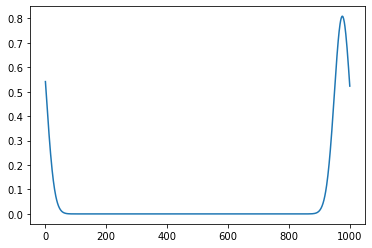

In [18]:
plt.plot(U)